In [ ]:
!pip install requests

In [1]:
import requests
import time

# Replace with your write API key
WRITE_API_KEY = REDACTED         # API key redacted for security

# Simulated data for cybersecurity metrics
intrusion_attempts = [0, 1, 2, 1, 3, 4, 2, 0, 5, 1]        # Intrusion attempts
antivirus_status = [1, 0, 1, 1, 0, 1, 1, 0, 1, 1]          # Antivirus status (1 = active, 0 = inactive)
security_alerts = [5, 3, 4, 2, 6, 7, 3, 4, 5, 2]           # Security alerts
cpu_usage = [20.5, 30.0, 25.5, 40.0, 35.0, 50.0, 45.5, 30.0, 60.0, 55.0] # CPU usage in percentage
login_attempts = [10, 12, 8, 15, 20, 18, 25, 30, 22, 17]   # Login attempts
failed_logins = [2, 1, 3, 0, 4, 5, 2, 3, 1, 0]             # Failed logins
firewall_blocks = [1, 0, 2, 3, 4, 5, 6, 7, 2, 3]           # Firewall blocks
defender_usage = [75.0, 80.5, 70.0, 85.0]                  # Microsoft Defender usage in %

# Loop to send data
for i in range(len(intrusion_attempts)):
    # Data to send
    data = {
        "field1": intrusion_attempts[i],   # Intrusion attempts
        "field2": antivirus_status[i],      # Antivirus status
        "field3": security_alerts[i],       # Security alerts
        "field4": cpu_usage[i],             # CPU usage
        "field5": login_attempts[i],        # Login attempts
        "field6": failed_logins[i],         # Failed logins
        "field7": firewall_blocks[i],       # Firewall blocks
        # Send defender_usage data only if i is within its range
        "field8": defender_usage[i] if i < len(defender_usage) else None,       # Microsoft Defender usage
    }

    # URL to send data to ThingSpeak
    url = REDACTED         # redacted for security

    # Send the data
    response = requests.post(url, data=data)

    # Check the response
    if response.status_code == 200:
        print("Data sent successfully:", response.text)
    else:
        print("Error sending data:", response.status_code, response.text)

    time.sleep(15)  # Wait 15 seconds between updates to respect rate limits


Data sent successfully: 191
Data sent successfully: 192
Data sent successfully: 193
Data sent successfully: 194
Data sent successfully: 195
Data sent successfully: 196
Data sent successfully: 197
Data sent successfully: 198
Data sent successfully: 199
Data sent successfully: 200


In [2]:
import requests

# Correct URL to retrieve the data
url = REDACTED         # redacted for security

# Make the GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    try:
        data = response.json()  # Convert the response to JSON
        feeds = data.get("feeds", [])

        if feeds:
            # Display the channel information
            channel_info = data.get("channel", {})
            print("Channel Information:")
            print("ID:", channel_info.get("id"))
            print("Name:", channel_info.get("name"))
            print("Description:", channel_info.get("description"))
            print()

            # Display the field values for each entry
            for feed in feeds:
                print(f"Entry ID: {feed['entry_id']}")
                print("Date and Time:", feed['created_at'])
                print("Intrusion Attempts (field1):", feed['field1'])
                print("Antivirus Status (field2):", feed['field2'])
                print("Security Alerts (field3):", feed['field3'])
                print("CPU Usage (field4):", feed['field4'])
                print("Login Attempts (field5):", feed['field5'])
                print("Failed Logins (field6):", feed['field6'])
                print("Firewall Blocks (field7):", feed['field7'])
                print("Microsoft Defender Usage (field8):", feed['field8'])
                print("-" * 40)  # Separator between entries
        else:
            print("No data found in the channel.")
    except ValueError:
        print(f"Error: The response is not valid JSON. Response: {response.text}")
else:
    print(f"Error retrieving data: {response.status_code} - {response.text}")


Channel Information:
ID: 2704114
Name: ThingSpeak Channel
Description: Collecting Data

Entry ID: 191
Date and Time: 2024-11-06T14:23:19Z
Intrusion Attempts (field1): 0
Antivirus Status (field2): 1
Security Alerts (field3): 5
CPU Usage (field4): 20.5
Login Attempts (field5): 10
Failed Logins (field6): 2
Firewall Blocks (field7): 1
Microsoft Defender Usage (field8): 75.0
----------------------------------------
Entry ID: 192
Date and Time: 2024-11-06T14:23:34Z
Intrusion Attempts (field1): 1
Antivirus Status (field2): 0
Security Alerts (field3): 3
CPU Usage (field4): 30.0
Login Attempts (field5): 12
Failed Logins (field6): 1
Firewall Blocks (field7): 0
Microsoft Defender Usage (field8): 80.5
----------------------------------------
Entry ID: 193
Date and Time: 2024-11-06T14:23:49Z
Intrusion Attempts (field1): 2
Antivirus Status (field2): 1
Security Alerts (field3): 4
CPU Usage (field4): 25.5
Login Attempts (field5): 8
Failed Logins (field6): 3
Firewall Blocks (field7): 2
Microsoft Defend

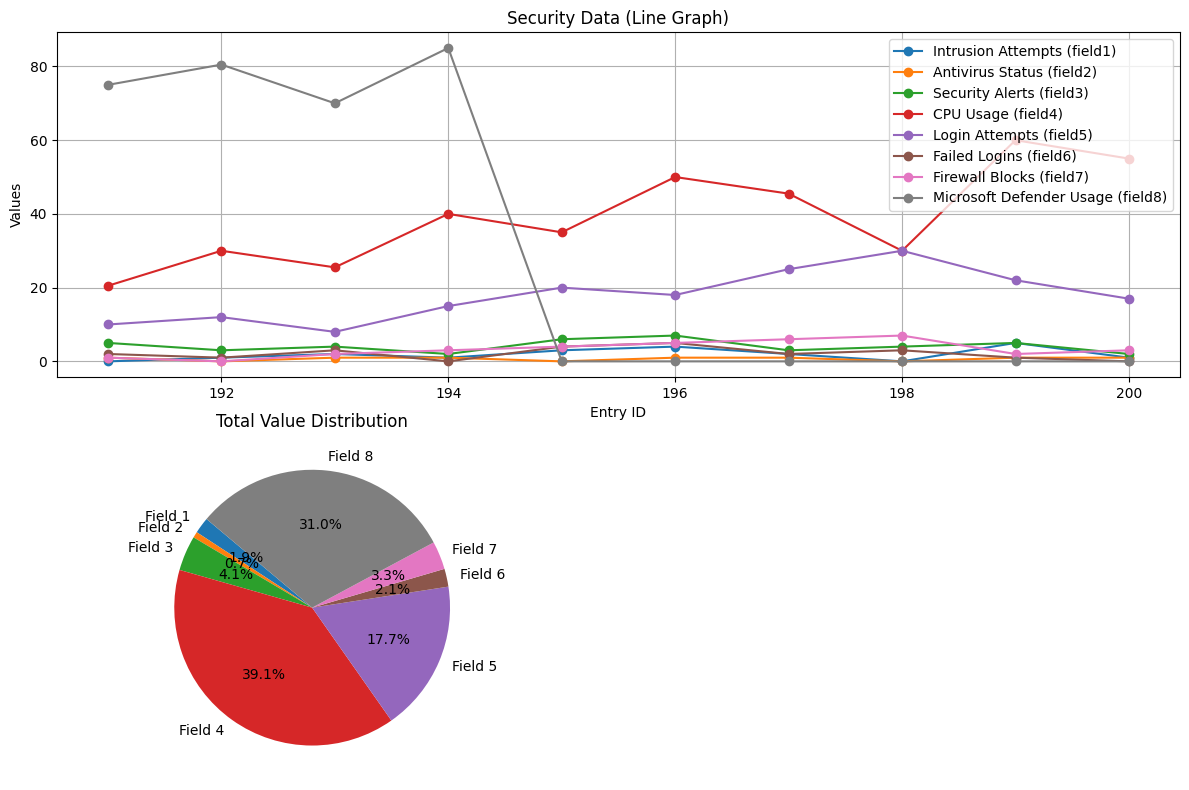

In [3]:
import requests
import matplotlib.pyplot as plt
import numpy as np

# Correct URL to retrieve the data
url = REDACTED         # redacted for security

# Make the GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    try:
        data = response.json()  # Convert the response to JSON
        feeds = data.get("feeds", [])

        if feeds:
            # Retrieve the data for the graph
            entry_ids = []
            field1_values = []
            field2_values = []
            field3_values = []
            field4_values = []
            field5_values = []
            field6_values = []
            field7_values = []
            field8_values = []

            # Store sums for the pie charts
            field1_sum = field2_sum = field3_sum = 0
            field4_sum = field5_sum = field6_sum = 0
            field7_sum = field8_sum = 0

            for feed in feeds:
                entry_ids.append(feed['entry_id'])
                field1_value = float(feed['field1']) if feed['field1'] else 0
                field2_value = float(feed['field2']) if feed['field2'] else 0
                field3_value = float(feed['field3']) if feed['field3'] else 0
                field4_value = float(feed['field4']) if feed['field4'] else 0
                field5_value = float(feed['field5']) if feed['field5'] else 0
                field6_value = float(feed['field6']) if feed['field6'] else 0
                field7_value = float(feed['field7']) if feed['field7'] else 0
                field8_value = float(feed['field8']) if feed['field8'] else 0

                # Append values to the lists
                field1_values.append(field1_value)
                field2_values.append(field2_value)
                field3_values.append(field3_value)
                field4_values.append(field4_value)
                field5_values.append(field5_value)
                field6_values.append(field6_value)
                field7_values.append(field7_value)
                field8_values.append(field8_value)

                # Sum up the values for pie chart
                field1_sum += field1_value
                field2_sum += field2_value
                field3_sum += field3_value
                field4_sum += field4_value
                field5_sum += field5_value
                field6_sum += field6_value
                field7_sum += field7_value
                field8_sum += field8_value

            # Plot the line graph
            plt.figure(figsize=(12, 8))

            plt.subplot(2, 1, 1)  # 1st row, 1st column
            plt.plot(entry_ids, field1_values, label='Intrusion Attempts (field1)', marker='o')
            plt.plot(entry_ids, field2_values, label='Antivirus Status (field2)', marker='o')
            plt.plot(entry_ids, field3_values, label='Security Alerts (field3)', marker='o')
            plt.plot(entry_ids, field4_values, label='CPU Usage (field4)', marker='o')
            plt.plot(entry_ids, field5_values, label='Login Attempts (field5)', marker='o')
            plt.plot(entry_ids, field6_values, label='Failed Logins (field6)', marker='o')
            plt.plot(entry_ids, field7_values, label='Firewall Blocks (field7)', marker='o')
            plt.plot(entry_ids, field8_values, label='Microsoft Defender Usage (field8)', marker='o')

            plt.title('Security Data (Line Graph)')
            plt.xlabel('Entry ID')
            plt.ylabel('Values')
            plt.legend()
            plt.grid()
            plt.tight_layout()

            # Plot the pie chart
            plt.subplot(2, 2, 3)  # 2nd row, 1st column for pie chart
            pie_labels = ['Field 1', 'Field 2', 'Field 3', 'Field 4', 'Field 5', 'Field 6', 'Field 7', 'Field 8']
            pie_data = [field1_sum, field2_sum, field3_sum, field4_sum, field5_sum, field6_sum, field7_sum, field8_sum]

            plt.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=140)
            plt.title('Total Value Distribution')

            # Show the plots
            plt.show()

        else:
            print("No data found in the channel.")
    except ValueError:
        print(f"Error: The response is not valid JSON. Response: {response.text}")
else:
    print(f"Error retrieving data: {response.status_code} - {response.text}")
